# Case Map

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import contextily as ctx

import ams
import andes

In [2]:
%matplotlib inline

In [3]:
ams.config_logger(stream_level=50)

In [4]:
sp = ams.load("./../cases/IL200_opf2.xlsx",
              setup=True, no_output=True,)

In [5]:
nc_stg = sp.StaticGen.find_idx(keys='genfuel', values=['nuclear'], allow_all=True)[0]
coal_stg = sp.StaticGen.find_idx(keys='genfuel', values=['coal'], allow_all=True)[0]
wind_stg = sp.StaticGen.find_idx(keys='genfuel', values=['wind'], allow_all=True)[0]
solar_stg = sp.StaticGen.find_idx(keys='genfuel', values=['solar'], allow_all=True)[0]
ess_stg = sp.StaticGen.find_idx(keys='genfuel', values=['ess'], allow_all=True)[0]

nc_bus = sp.StaticGen.get(src='bus', attr='v', idx=nc_stg)
coal_bus = sp.StaticGen.get(src='bus', attr='v', idx=coal_stg)
wind_bus = sp.StaticGen.get(src='bus', attr='v', idx=wind_stg)
solar_bus = sp.StaticGen.get(src='bus', attr='v', idx=solar_stg)
ess_bus = sp.StaticGen.get(src='bus', attr='v', idx=ess_stg)

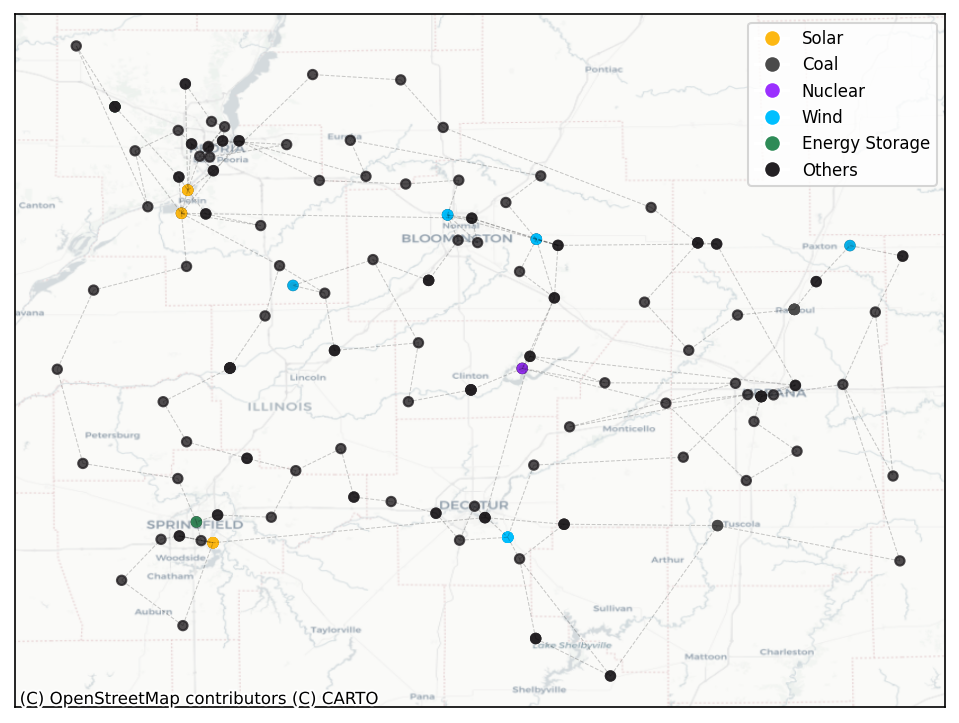

In [6]:
plt.style.use('default')

# Create a scatter plot
fig, ax = plt.subplots(1, 1,
                      figsize=(8, 6), dpi=150)

for i in range(sp.Line.n):
    bus1 = sp.Line.bus1.v[i]
    bus2 = sp.Line.bus2.v[i]
    x = sp.Bus.get(src='xcoord', attr='v', idx=[bus1, bus2])
    y = sp.Bus.get(src='ycoord', attr='v', idx=[bus1, bus2])
    ax.plot(x, y, color='black', linewidth=0.5, alpha=0.2, linestyle='--')

# Map bus types to colors
bus_colors = ['#FDB813' if bus in solar_bus else
              '#4B4B4B' if bus in coal_bus else
              '#9B30FF' if bus in nc_bus else
              '#00BFFF' if bus in wind_bus else
              '#2E8B57' if bus in ess_bus else
              '#242124' for bus in sp.Bus.idx.v]

# Plot buses with colors based on their type
ax.scatter(sp.Bus.xcoord.v, sp.Bus.ycoord.v,
           c=bus_colors, marker='o', label='Buses',
           alpha=0.8, s=20)  # Adjust the marker size using the 's' parameter

# Add legend for bus types
legend_elements = [
       Line2D([0], [0], marker='o', color='w',
                 markerfacecolor='#FDB813', markersize=8, label='Solar'),
       Line2D([0], [0], marker='o', color='w',
                 markerfacecolor='#4B4B4B', markersize=8, label='Coal'),
       Line2D([0], [0], marker='o', color='w',
                 markerfacecolor='#9B30FF', markersize=8, label='Nuclear'),
       Line2D([0], [0], marker='o', color='w',
                 markerfacecolor='#00BFFF', markersize=8, label='Wind'),
       Line2D([0], [0], marker='o', color='w',
                 markerfacecolor='#2E8B57', markersize=8, label='Energy Storage'),
       Line2D([0], [0], marker='o', color='w',
                 markerfacecolor='#242124', markersize=8, label='Others')
       ]

ax.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Add a base map layer
ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.Positron)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.savefig('./../results/fig_case.pdf', dpi=200, bbox_inches='tight')